<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W6D4_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [3]:
print(ninja_data.head())
ninja_data.info()

     Time  Temperature     Pressure  Chemical Concentration
0  0.0000    20.882026  1033.555963                4.693416
1  0.1001    20.231526  1033.890892                4.720490
2  0.2002    20.552262  1032.571356                5.134934
3  0.3003    21.214783  1033.090475                4.996730
4  0.4004    21.059555  1033.202742                5.234754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   float64
 1   Temperature             1000 non-null   float64
 2   Pressure                1000 non-null   float64
 3   Chemical Concentration  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [10]:
ninja_data_normalized = (ninja_data - ninja_data.mean()) / ninja_data.std()
print(ninja_data_normalized)

         Time  Temperature  Pressure  Chemical Concentration
0   -1.729454     0.253054  1.444895               -0.206291
1   -1.725992     0.071093  1.468476               -0.187444
2   -1.722530     0.160811  1.375573                0.101064
3   -1.719067     0.346135  1.412122                0.004856
4   -1.715605     0.302714  1.420026                0.170552
..        ...          ...       ...                     ...
995  1.715605     0.028892  1.410852                0.121938
996  1.719067    -0.047807  1.503425               -0.250366
997  1.722530     0.001911  1.416461               -0.107164
998  1.725992    -0.162974  1.325244               -0.205458
999  1.729454    -0.043757  1.313452               -0.004089

[1000 rows x 4 columns]


In [15]:
data_range = ninja_data_normalized.max() - ninja_data_normalized.min()
wide_range_columns = data_range[data_range > 10].index
ninja_data_normalized[wide_range_columns] = np.log(ninja_data_normalized[wide_range_columns])

In [16]:
time_series_data = ninja_data_normalized['Temperature']
fourier_transformed_data = np.fft.fft(time_series_data)
print(fourier_transformed_data)

[ 1.39888101e-13+0.00000000e+00j  1.07420133e+01-6.99947851e+02j
  4.23896543e+00+1.21099227e+00j  4.27241857e-01-1.81436877e+00j
  2.04712621e+00+4.23326247e+00j -1.28795907e+00+2.73196515e+00j
  1.81311327e+00+8.63720454e+00j  1.67051122e+00+7.06774409e+00j
  1.74003726e-01+2.02943089e+00j  1.18754930e+00+2.00316435e+00j
  6.01020115e+00-4.73631586e+00j  3.68009385e+00-5.97220125e+00j
 -1.15584182e+00-1.57300779e+00j -8.55480101e-01-2.26514113e+00j
  3.07680266e+00+3.12725411e+00j -5.22661854e+00-7.92542592e+00j
 -3.07493342e-01-2.88022613e+00j  2.71698860e+00+1.95659945e+00j
 -1.10998261e+00+1.14287688e+00j  8.44717591e-01+5.73311729e-01j
  1.50289588e+00+4.47606869e-01j -8.06291697e-02-3.13048401e+00j
 -1.21621355e+00-1.71040389e+00j -2.39898364e+00-9.29689141e-01j
  3.28887490e+00+2.98835224e+00j  5.72843809e+00-3.25919549e+00j
 -3.72649079e+00+2.74698869e-01j -7.30224815e-01-1.92661431e+00j
  3.48906164e-01-1.19374073e+00j  2.31390920e+00+8.57000089e-01j
  2.88618937e-01-1.204794

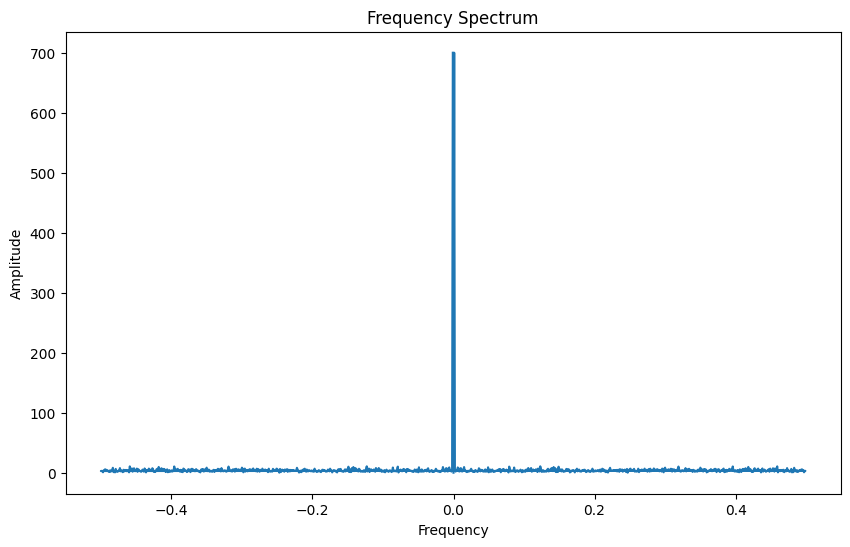

In [7]:
import matplotlib.pyplot as plt

frequencies = np.fft.fftfreq(len(time_series_data))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fourier_transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.show()

In [9]:
from scipy import stats
data_description = ninja_data.describe()
print(data_description)

              Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763


In [17]:
correlation_matrix = ninja_data.corr()

correlation_coefficient, p_value = stats.pearsonr(ninja_data['Temperature'], ninja_data['Pressure'])

if correlation_coefficient > 0:
    correlation_interpretation = "There is a positive correlation"
elif correlation_coefficient < 0:
    correlation_interpretation = "There is a negative correlation"
else:
    correlation_interpretation = "There is no correlation"

if p_value < 0.05:
    significance = "significant"
else:
    significance = "not significant"

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
print(f"Interpretation: {correlation_interpretation}, and it is {significance}")

Correlation coefficient: 0.007112292067251669
P-value: 0.8222655963580461
Interpretation: There is a positive correlation, and it is not significant


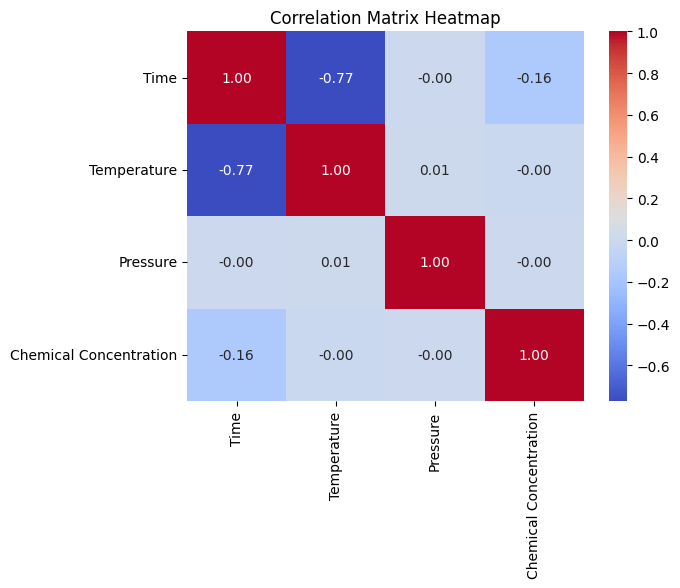

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ninja_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

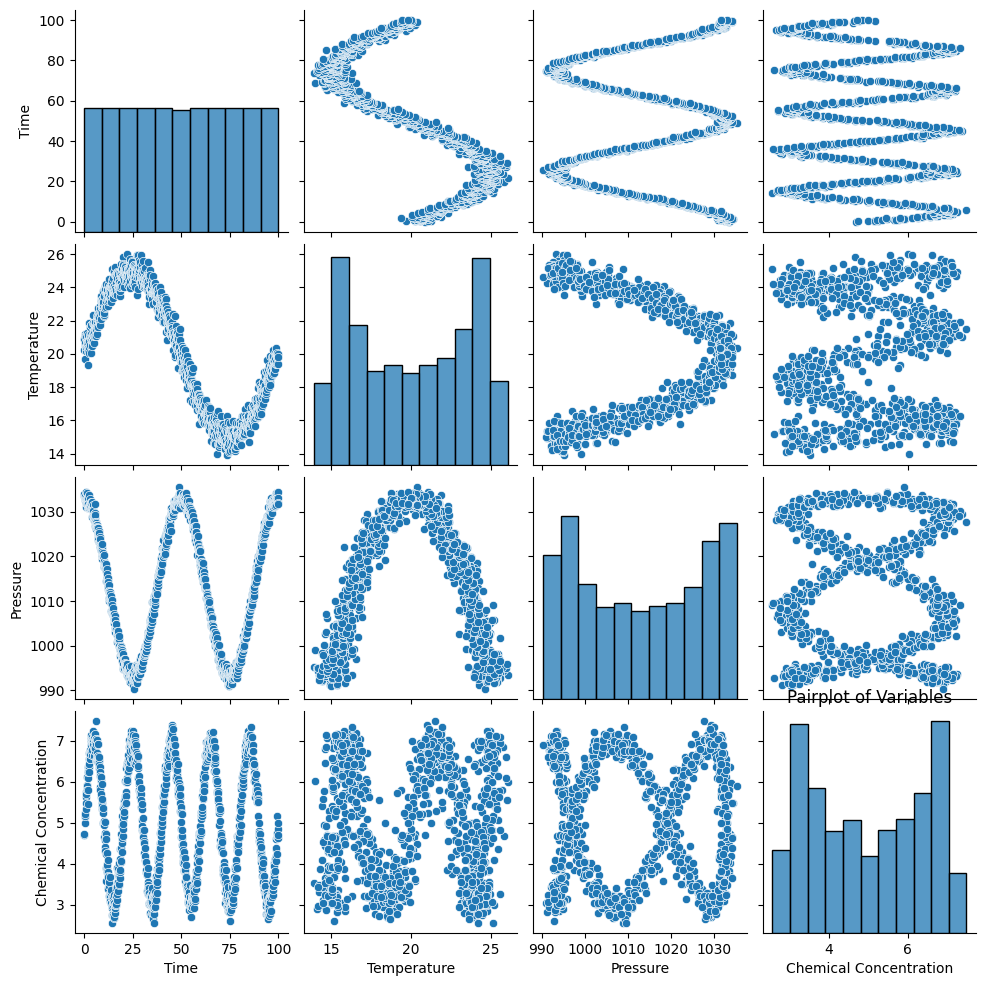

In [19]:
sns.pairplot(ninja_data)
plt.title('Pairplot of Variables')
plt.show()

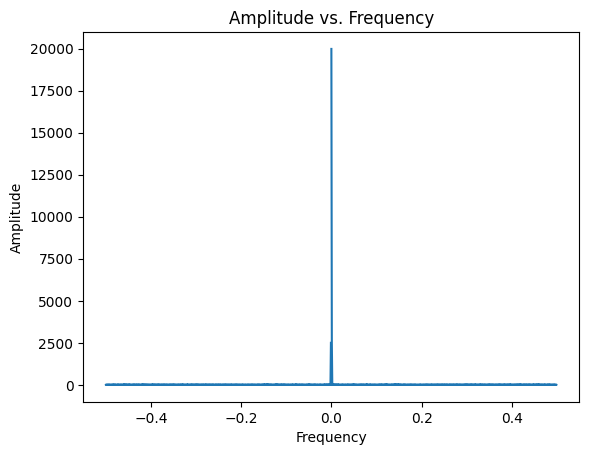

In [20]:
fft_data = np.fft.fft(ninja_data['Temperature'])
frequencies = np.fft.fftfreq(len(time))
plt.plot(frequencies, np.abs(fft_data))
plt.title('Amplitude vs. Frequency')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

**Report**

As we can see from the heatmap there is only one positive correlation between temperature and pressure, but it's so low, that we can say that pressure variations are more dependent on other external factors not included in this dataset.

The scatter plots from the pairplot provide visual evidence of the relationships suggested by the correlation matrix. Linear or curvilinear trends in these plots can indicate potential direct or inverse relationships.

The amplitude vs. frequency graph for the temperature data reveals the dominant frequencies or periodicities in the temperature variations. Peaks in this graph suggest the presence of regular cycles in temperature changes, which could be seasonal or operational cycles in a real-world setting.